In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from tqdm import tqdm
import numpy as np

In [38]:
data = pd.read_csv("dataset_mood_smartphone.csv", index_col=0)              # Load the data                                                    
data[['date', 'time']] = data['time'].str.split(' ', expand=True) 
data.head()

,id,time,variable,value,date
1,AS14.01,13:00:00.000,mood,6.0,2014-02-26
2,AS14.01,15:00:00.000,mood,6.0,2014-02-26
3,AS14.01,18:00:00.000,mood,6.0,2014-02-26
4,AS14.01,21:00:00.000,mood,7.0,2014-02-26
5,AS14.01,09:00:00.000,mood,6.0,2014-02-27


In [30]:
data.tail()

,id,time,variable,value,date
2770399,AS14.30,07:51:16.948,appCat.weather,8.032,2014-04-11
2772465,AS14.30,11:00:32.747,appCat.weather,3.008,2014-04-19
2774026,AS14.30,10:19:07.434,appCat.weather,7.026,2014-04-26
2774133,AS14.30,00:44:48.450,appCat.weather,23.033,2014-04-27
2784435,AS14.32,18:25:14.036,appCat.weather,22.431,2014-04-07


In [31]:
data_mood = data[data["variable"] == "mood" ]                               # Select the rows where the variable is "mood"
result_mood = data_mood.groupby(['id', 'date']).agg({'value': 'mean'}).reset_index()   # Group by id and date and calculate the mean of the value column

In [32]:
result_mood.describe()

,value
count,1268.000000
mean,6.990063
std,0.736465
min,3.000000
25%,6.600000
50%,7.000000
75%,7.500000
max,9.333333


In [33]:
len(data['date'].unique()), len(data['id'].unique())                       # Check the number of unique dates and ids

(113, 27)

In [34]:
unique_dates = result_mood['date'].unique()  # Get the unique dates
unique_ids = result_mood["id"].unique()      # Get the unique ids
print(len(unique_dates))                # Print the number of unique dates
print(len(unique_ids))                  # Print the number of unique ids

98
27


<Axes: xlabel='value', ylabel='Count'>

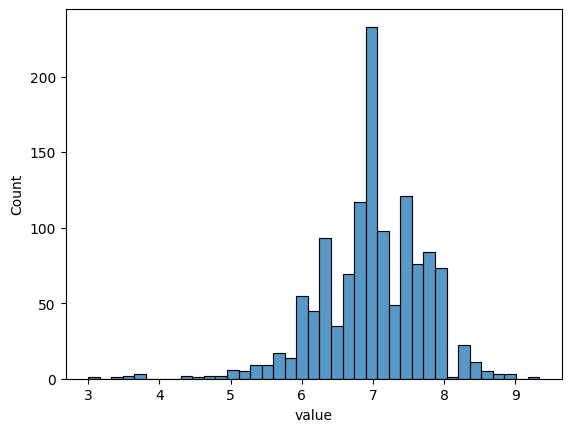

In [35]:
sns.histplot(result_mood, x="value")  # Create a histogram of the values

In [36]:
data["variable"].unique()

array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather'],
      dtype=object)

In [37]:
for column in data["variable"].unique():
    data[column] = data[data["variable"] == column]["value"]

In [46]:
data_arousal = data[data["variable"] == "circumplex.arousal"]
data_screen = data[data["variable"] == "screen"]                # Select the rows where the variable is "screen"
data_valence = data[data["variable"] == "circumplex.valence"]   # Select the rows where the variable is "circumplex.valence"
data_activity = data[data["variable"] == "activity"]            # Select the rows where the variable is "activity"  
data_call = data[data["variable"] == "call"]
data_sms = data[data["variable"] == "sms"]
data_built_in = data[data["variable"] == "appCat.builtin"]  
data_communication = data[data["variable"] == "appCat.communication"]
data_entertainment = data[data["variable"] == "appCat.entertainment"]
data_finance = data[data["variable"] == "appCat.finance"]
data_game = data[data["variable"] == "appCat.game"]
data_office = data[data["variable"] == "appCat.office"]
data_other = data[data["variable"] == "appCat.other"]
data_social = data[data["variable"] == "appCat.social"]
data_travel = data[data["variable"] == "appCat.travel"]
data_unknown = data[data["variable"] == "appCat.unknown"]
data_utility = data[data["variable"] == "appCat.utilities"]
data_weather = data[data["variable"] == "appCat.weather"]

In [40]:
df2 = pd.DataFrame(columns= ['index', 'mean', 'max', 'min'], index=range(0, len(data['variable'].unique())))
for i, column in tqdm(enumerate(data['variable'].unique())):
    df = data[data["variable"] == column]
    values = [column, df['value'].mean(), df['value'].max(), df['value'].min()]
    df2.loc[i] = values 

19it [00:00, 109.07it/s]


In [41]:
df2

,index,mean,max,min
0,mood,6.992555,10.0,1.0
1,circumplex.arousal,-0.098624,2.0,-2.0
2,circumplex.valence,0.687808,2.0,-2.0
3,activity,0.115958,1.0,0.0
4,screen,75.335206,9867.007,0.035
5,call,1.0,1.0,1.0
6,sms,1.0,1.0,1.0
7,appCat.builtin,18.538262,33960.246,-82798.871
8,appCat.communication,43.343792,9830.777,0.006
9,appCat.entertainment,37.57648,32148.677,-0.011


In [56]:
# Find negative values in the column and set them to positive
negative_indices = data_built_in['value'] < 0
data_built_in.loc[negative_indices, 'value'] = data_built_in.loc[negative_indices, 'value'].abs()
negative_indices = data_entertainment['value'] < 0
data_entertainment.loc[negative_indices, 'value'] = data_entertainment.loc[negative_indices, 'value'].abs()


In [60]:
data_built_in.max(), data_entertainment.min()

(id                 AS14.33
 time          23:59:59.946
 variable    appCat.builtin
 value            82798.871
 date            2014-06-08
 dtype: object,
 id                       AS14.01
 time                00:00:01.065
 variable    appCat.entertainment
 value                      0.001
 date                  2014-03-13
 dtype: object)

In [105]:
result_screen = data_screen.groupby(['id', 'date']).agg({'value': 'sum'}).reset_index().rename(columns={'value': 'screen_time'})
result_arousal = data_arousal.groupby(['id', 'date']).agg({'value': 'mean'}).reset_index().rename(columns={'value': 'arousal_value'})
result_valence = data_valence.groupby(['id', 'date']).agg({'value': 'mean'}).reset_index().rename(columns={'value': 'valence_value'})
result_activity = data_activity.groupby(['id', 'date']).agg({"value": "mean"}).reset_index().rename(columns={'value': 'activity_time'})
result_call = data_call.groupby(['id', 'date']).agg({"value":"sum"}).reset_index().rename(columns={'value': 'call_time'})
result_sms = data_sms.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'sms_time'})
result_built_in = data_built_in.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'built_in_time'})
result_communication = data_communication.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'communication_time'})
result_entertainment = data_entertainment.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'entertainment_time'})
result_finance = data_finance.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'finance_time'})
result_game = data_game.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'game_time'})
result_office = data_office.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'office_time'})
result_other = data_other.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'other_time'})
result_social = data_social.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'social_time'})
result_travel = data_travel.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'travel_time'})    
result_unknown = data_unknown.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'unknown_time'})
result_utility = data_utility.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'utility_time'})
result_weather = data_weather.groupby(['id', 'date']).agg({"value" : "sum"}).reset_index().rename(columns={'value': 'weather_time'})

In [107]:
result_built_in.max()

id                  AS14.33
date             2014-06-08
built_in_time     85229.812
dtype: object

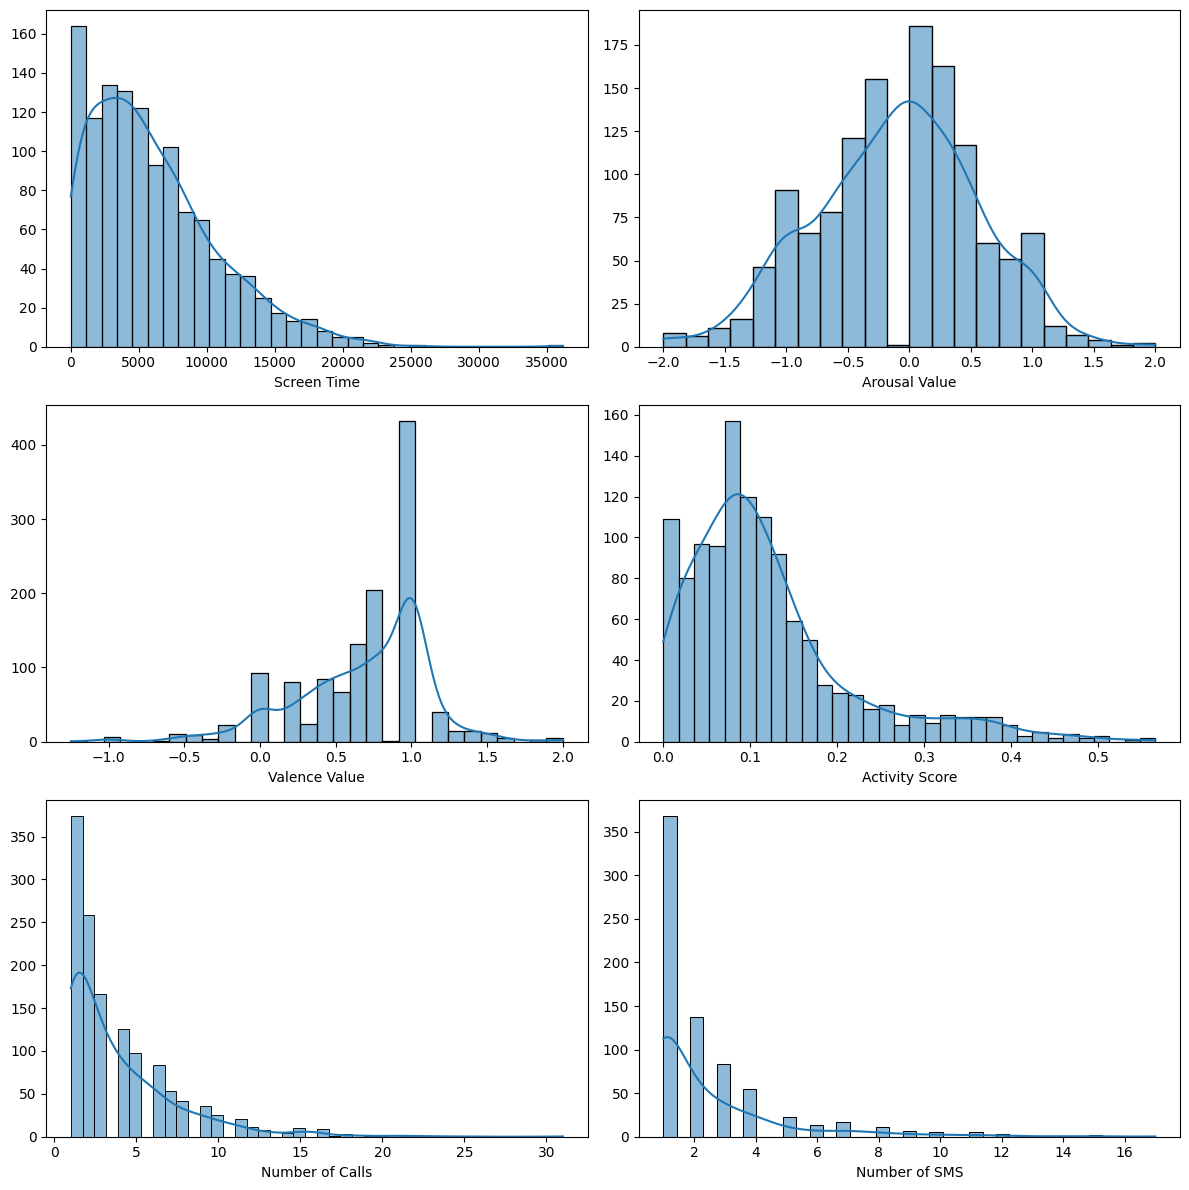

In [108]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Plotting histograms for each activity
sns.histplot(data=result_screen, x="screen_time", label="Screen", kde=True, ax=axes[0])
axes[0].set_xlabel("Screen Time")

sns.histplot(data=result_arousal, x="arousal_value", label="Arousal", kde=True, ax=axes[1])
axes[1].set_xlabel("Arousal Value")

sns.histplot(data=result_valence, x="valence_value", label="Valence", kde=True, ax=axes[2])
axes[2].set_xlabel("Valence Value")

sns.histplot(data=result_activity, x="activity_time", label="Activity", kde=True, ax=axes[3])
axes[3].set_xlabel("Activity Score")

sns.histplot(data=result_call, x="call_time", label="Call", kde=True, ax=axes[4])
axes[4].set_xlabel("Number of Calls")

sns.histplot(data=result_sms, x="sms_time", label="SMS", kde=True, ax=axes[5])
axes[5].set_xlabel("Number of SMS")

# Removing y-axis label to save space
for ax in axes:
    ax.set_ylabel("")

plt.tight_layout()
plt.show()



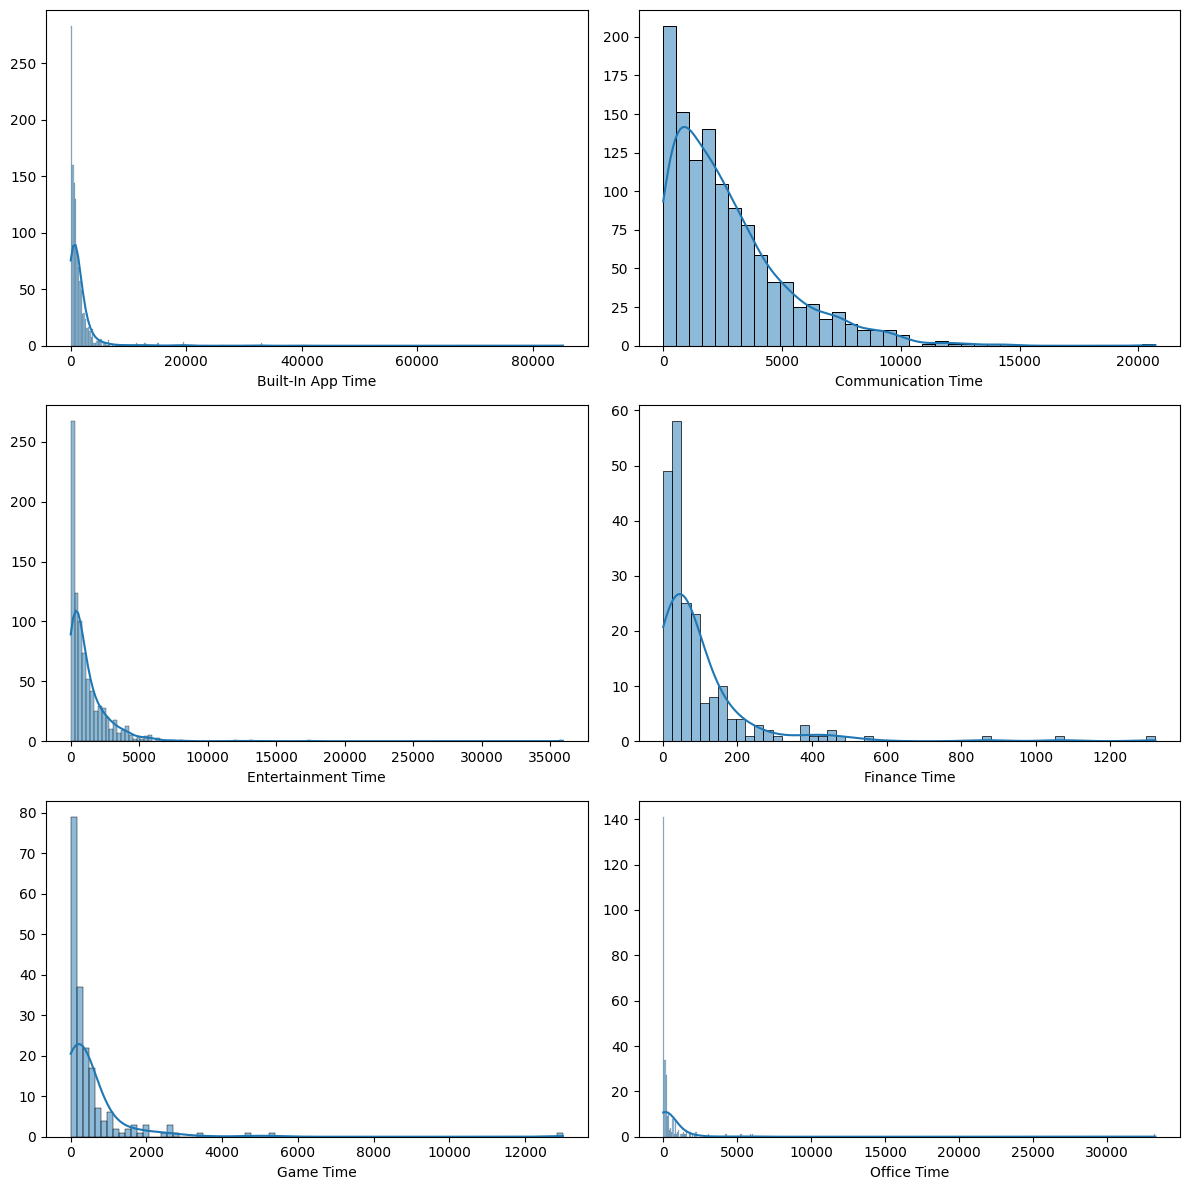

In [109]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Plotting histograms for each activity
sns.histplot(data=result_built_in, x="built_in_time", label="Built-In App", kde=True, ax=axes[0])
axes[0].set_xlabel("Built-In App Time")

sns.histplot(data=result_communication, x="communication_time", label="Communication", kde=True, ax=axes[1])
axes[1].set_xlabel("Communication Time")

sns.histplot(data=result_entertainment, x="entertainment_time", label="Entertainment", kde=True, ax=axes[2])
axes[2].set_xlabel("Entertainment Time")

sns.histplot(data=result_finance, x="finance_time", label="Finance", kde=True, ax=axes[3])
axes[3].set_xlabel("Finance Time")

sns.histplot(data=result_game, x="game_time", label="Game", kde=True, ax=axes[4])
axes[4].set_xlabel("Game Time")

sns.histplot(data=result_office, x="office_time", label="Office", kde=True, ax=axes[5])
axes[5].set_xlabel("Office Time")

# Removing y-axis label to save space
for ax in axes:
    ax.set_ylabel("")

plt.tight_layout()
plt.show()


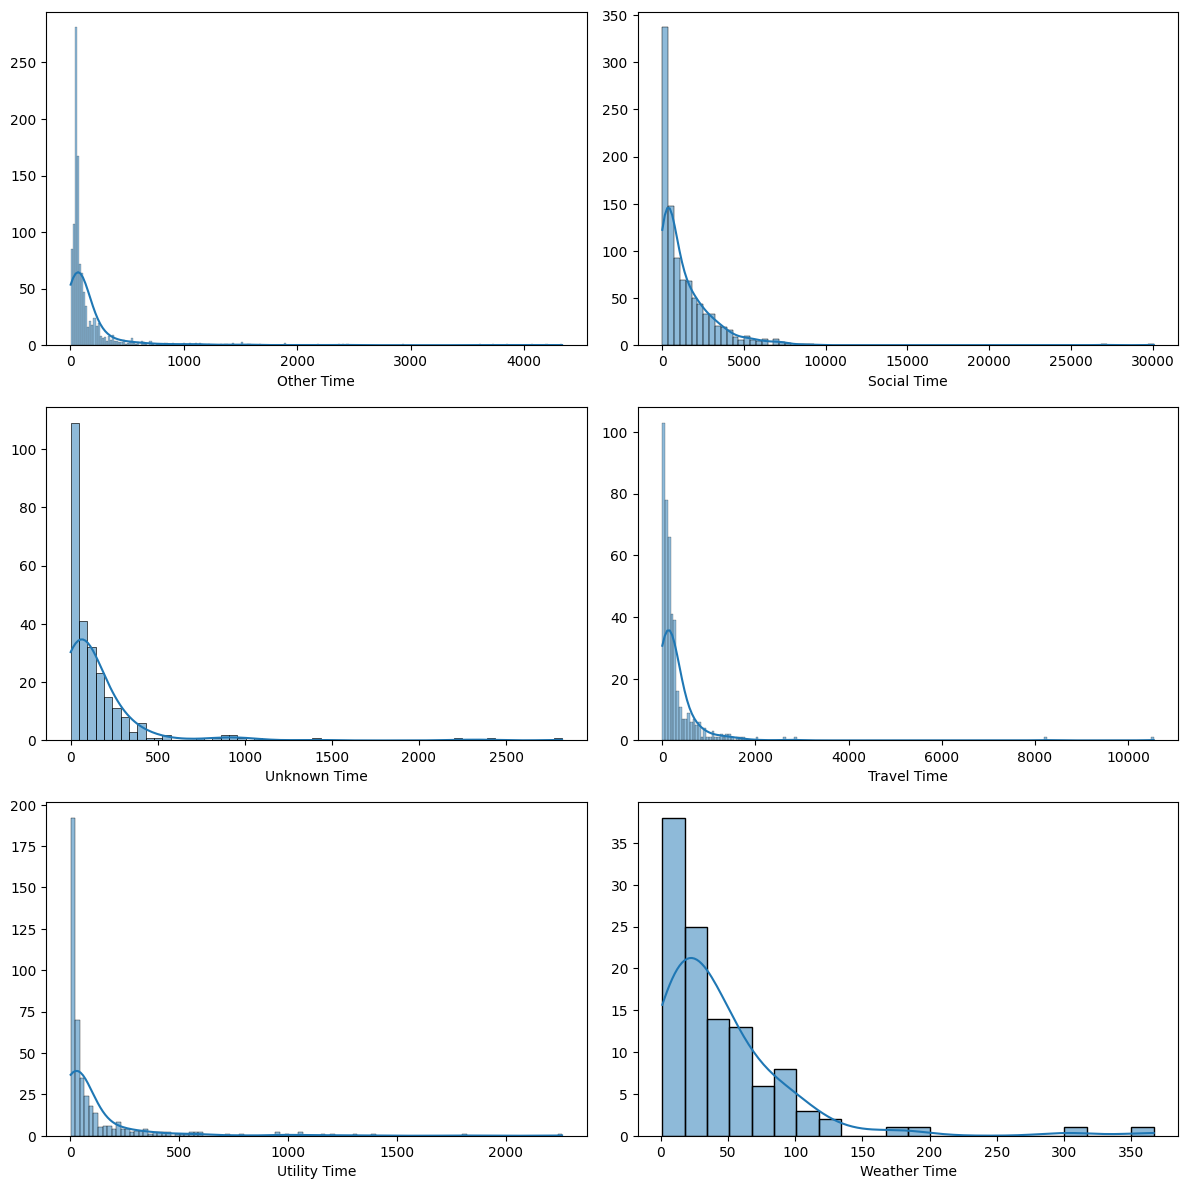

In [110]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Plotting histograms for each activity
sns.histplot(data=result_other, x="other_time", label="Other", kde=True, ax=axes[0])
axes[0].set_xlabel("Other Time")

sns.histplot(data=result_social, x="social_time", label="Social", kde=True, ax=axes[1])
axes[1].set_xlabel("Social Time")

sns.histplot(data=result_unknown, x="unknown_time", label="Unknown", kde=True, ax=axes[2])
axes[2].set_xlabel("Unknown Time")

sns.histplot(data=result_travel, x="travel_time", label="Travel", kde=True, ax=axes[3])
axes[3].set_xlabel("Travel Time")

sns.histplot(data=result_utility, x="utility_time", label="Utility", kde=True, ax=axes[4])
axes[4].set_xlabel("Utility Time")

sns.histplot(data=result_weather, x="weather_time", label="Weather", kde=True, ax=axes[5])
axes[5].set_xlabel("Weather Time")

# Removing y-axis label to save space
for ax in axes:
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

In [111]:
result_combined = result_screen.join(result_arousal.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_valence.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_activity.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_call.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_sms.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_built_in.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_communication.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_entertainment.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_finance.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_game.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_office.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_other.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_social.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_travel.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_unknown.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_utility.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_weather.set_index(['id', 'date']), on=['id', 'date'])
result_combined = result_combined.join(result_mood.set_index(['id', 'date']), on=['id', 'date'])

In [199]:
final_df = result_combined

<Axes: ylabel='count'>

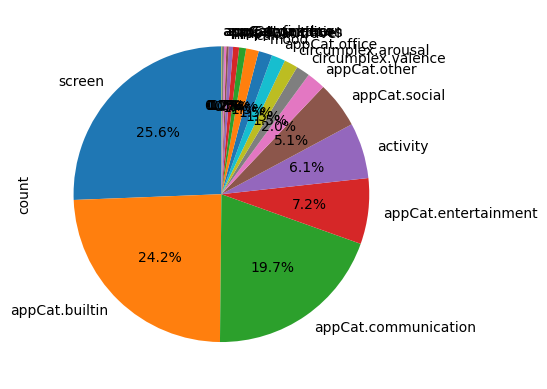

In [113]:
# Plot a pie chart
value_counts = data['variable'].value_counts()
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

In [200]:
final_df = final_df.dropna(subset=['value'])

<Axes: >

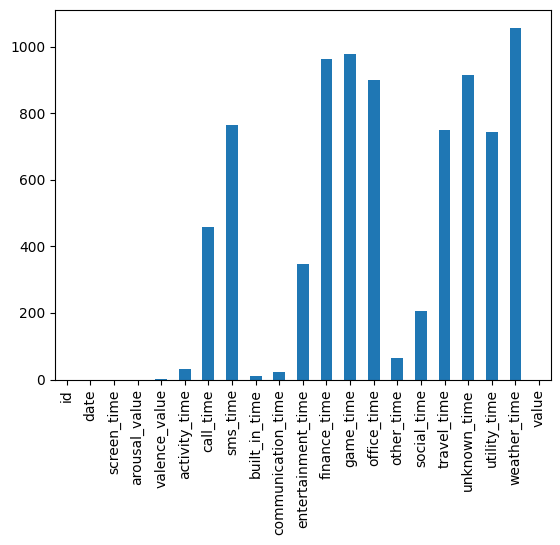

In [201]:
null_counts = final_df.isnull().sum()
null_counts.plot(kind='bar')

In [202]:
final_df = final_df.drop(columns=['id', 'date' ])

In [203]:
final_df.head()

,screen_time,arousal_value,valence_value,activity_time,call_time,sms_time,built_in_time,communication_time,entertainment_time,finance_time,game_time,office_time,other_time,social_time,travel_time,unknown_time,utility_time,weather_time,value
1,17978.907000,0.2,0.2,0.134050,6.0,NaN,3139.218,6280.890,1007.456,49.544,NaN,172.206,239.751,4508.500,915.445,NaN,598.754,NaN,6.20
2,6142.161000,0.6,0.5,0.236880,3.0,1.0,731.429,4962.918,93.324,21.076,NaN,NaN,98.143,439.632,37.305,NaN,117.621,NaN,6.40
3,6773.832001,0.2,0.8,0.142741,NaN,NaN,1286.246,5237.319,94.346,43.403,NaN,NaN,72.823,900.839,NaN,NaN,30.086,30.386,6.80
4,15047.351001,0.8,0.0,0.078961,10.0,NaN,866.956,9270.629,976.971,34.106,NaN,3.010,66.558,3223.626,419.805,NaN,178.732,NaN,6.00
5,21475.354999,0.5,0.5,0.098374,NaN,1.0,1032.768,10276.751,68.206,43.054,NaN,NaN,178.819,1919.471,NaN,235.223,222.893,NaN,6.75


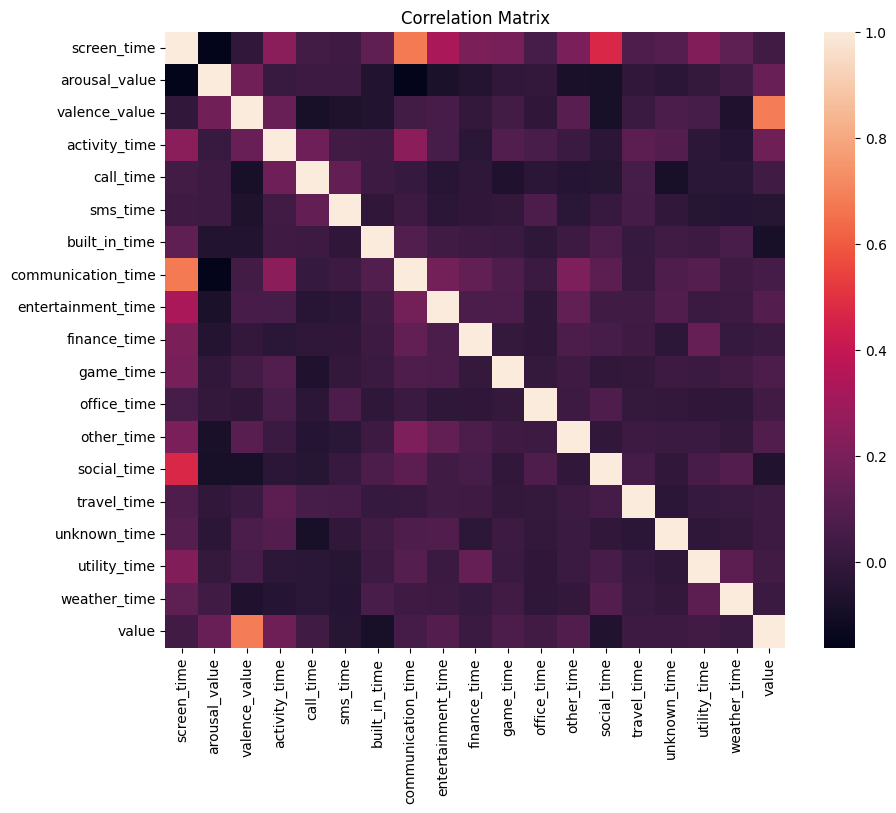

In [206]:
# Calculate correlation matrix
corr_matrix = final_df .corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix')
plt.show()

In [205]:
final_df = final_df.fillna(0)

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [224]:
X = final_df.drop(columns=['value'])
y = final_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Model Training
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5400249287749288


In [225]:
X = np.array(final_df['valence_value']).reshape(-1, 1)
y = final_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Model Training
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2944955230690532


In [226]:
X = np.array(final_df['arousal_value']).reshape(-1, 1)
y = final_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Model Training
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.6475839145158877


In [227]:
X = final_df[['valence_value', 'arousal_value']]
y = final_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Model Training
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.38972422192348627


In [228]:
X = final_df[['valence_value', 'arousal_value', 'screen_time']]
y = final_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Model Training
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5385256410256409


In [229]:
X = final_df[['valence_value', 'arousal_value', 'screen_time', 'activity_time']]
y = final_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Model Training
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.553170702754036


In [231]:
correlation_matrix = final_df.corr().abs()
correlation_with_target = correlation_matrix['value'].drop('value')

# Sort features based on their correlation with the target variable
sorted_features = correlation_with_target.sort_values(ascending=False)


In [235]:
type(sorted_features.index[0])

str

In [244]:
X = final_df.drop(columns=['value'])
y = final_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 3: Define a model
regressor = DecisionTreeRegressor(random_state=42)

# Step 4: Iterative feature elimination
n_features = X_train.shape[1]
selected_features = sorted_features.index
remaining_features = []


scores = []
for feature in selected_features:
    remaining_features.append(feature)
    X_train_subset = X_train[remaining_features]
    X_test_subset = X_test[remaining_features]
    regressor.fit(X_train_subset, y_train)
    y_pred = regressor.predict(X_test_subset)
    mse = mean_squared_error(y_test, y_pred)
    scores.append((mse))
    
    # Remove the least important feature
    scores.sort()
    

valence_value
activity_time
arousal_value
entertainment_time
built_in_time
other_time
game_time
social_time
communication_time
sms_time
utility_time
office_time
screen_time
call_time
unknown_time
travel_time
weather_time
finance_time


In [242]:
selected_features

Index(['valence_value', 'activity_time', 'arousal_value', 'entertainment_time',
       'built_in_time', 'other_time', 'game_time', 'social_time',
       'communication_time', 'sms_time', 'utility_time', 'office_time',
       'screen_time', 'call_time', 'unknown_time', 'travel_time',
       'weather_time', 'finance_time'],
      dtype='object')

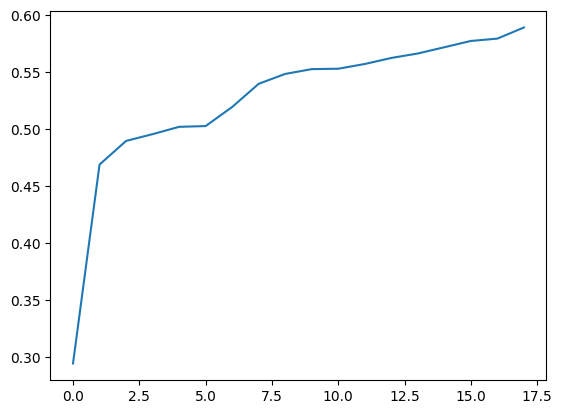

In [245]:
plt.plot(scores)

In [166]:
X_train[remaining_features]

,screen_time,arousal_value
604,5473.925999,0.800000
189,6928.638002,-0.200000
758,10167.088000,0.000000
183,4132.476999,0.250000
610,5742.628002,0.600000
...,...,...
1071,14133.542001,-1.000000
1124,5388.959000,-0.500000
1166,10896.482999,0.000000
881,7556.272999,-0.200000


In [152]:
X_train[:, remaining_features]

InvalidIndexError: (slice(None, None, None), ['arousal_value', 'valence_value', 'activity_time', 'call_time', 'sms_time', 'built_in_time', 'communication_time', 'entertainment_time', 'finance_time', 'game_time', 'office_time', 'other_time', 'social_time', 'travel_time', 'unknown_time', 'utility_time', 'weather_time'])

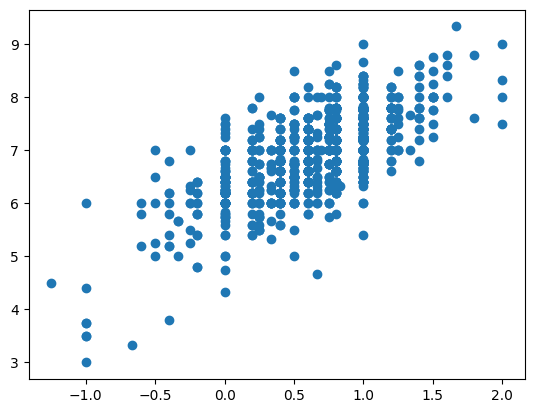

In [120]:
plt.scatter(final_df['valence_value'], final_df['value'])

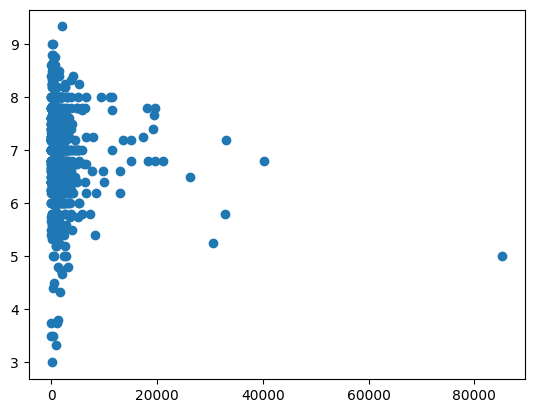

In [121]:
plt.scatter(final_df['built_in_time'], final_df['value'])

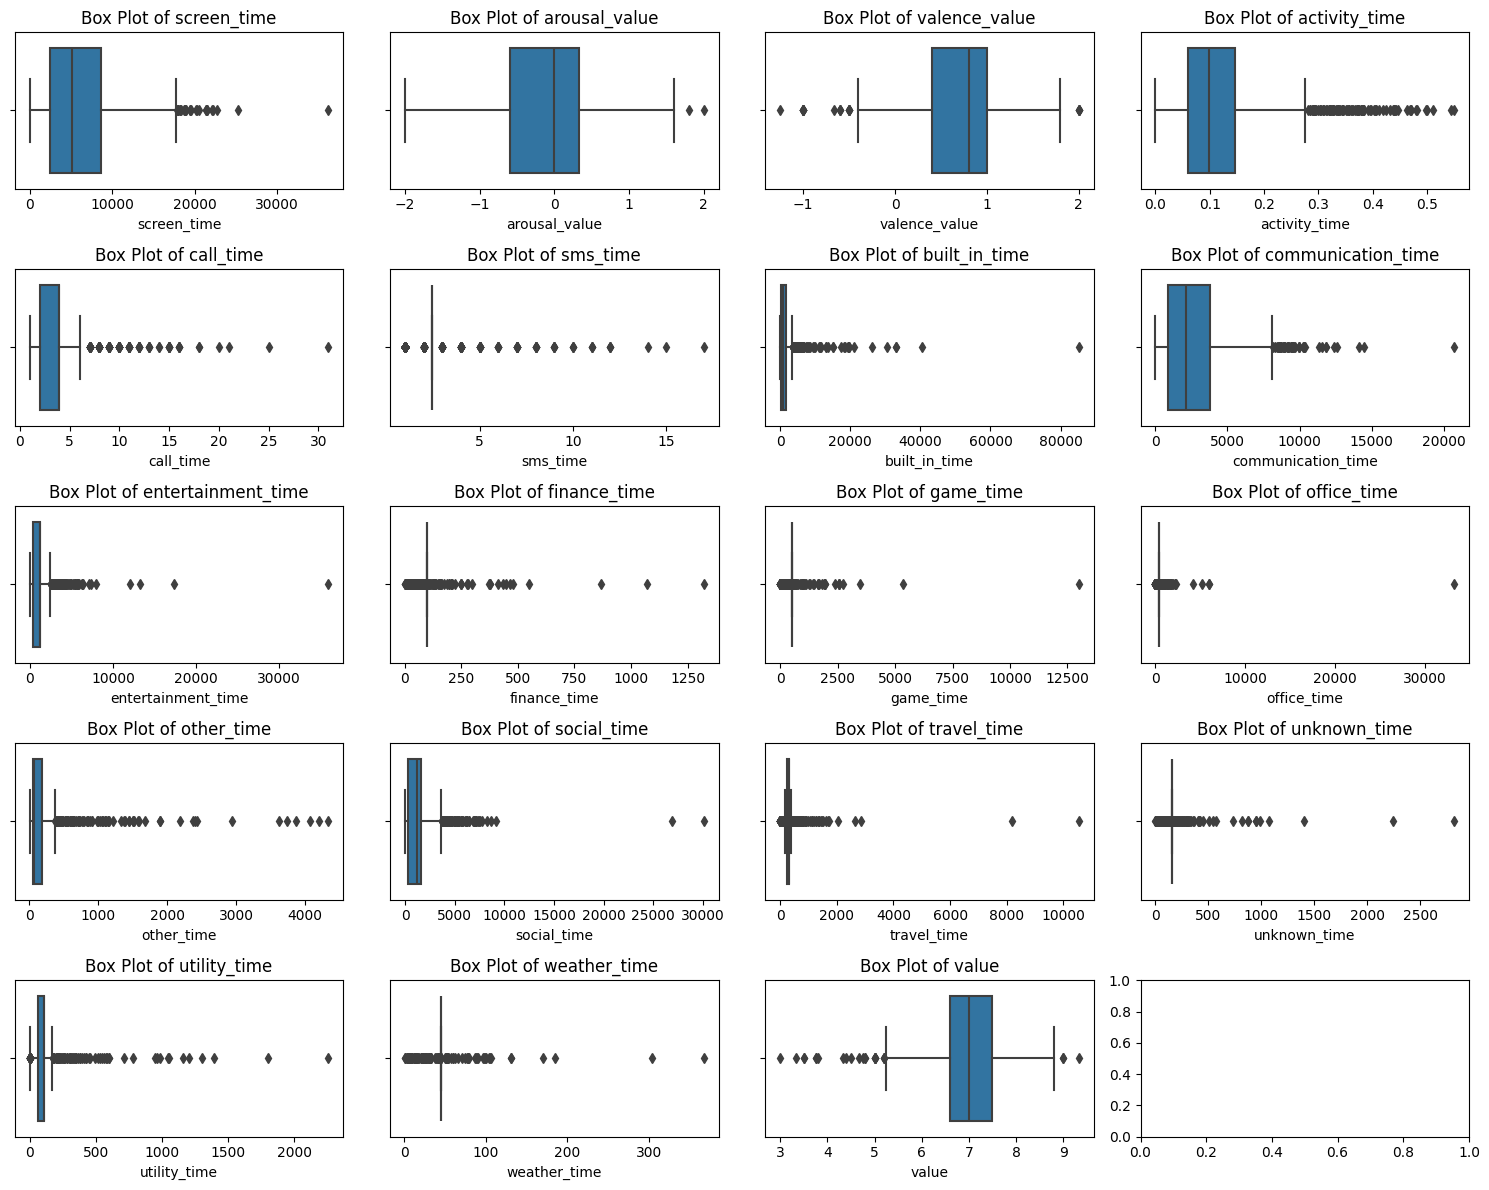

In [123]:
# Create multiple subplots for each column
fig, axes = plt.subplots(5, 4, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(final_df.columns):
    sns.boxplot(x=final_df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

# Hide any unused subplots
# for j in range(len(df.columns), len(axes)):
#     axes[j].axis('off')

plt.tight_layout()
plt.show()

In [104]:
final_df.skew().sort_values(ascending=False)

office_time           28.270196
game_time             19.001072
travel_time           16.785154
built_in_time         11.682998
unknown_time          11.628350
finance_time          10.993283
weather_time          10.656788
entertainment_time    10.250447
utility_time           7.828208
social_time            6.745080
other_time             6.589836
sms_time               4.486821
call_time              2.931363
activity_time          1.614003
communication_time     1.609781
screen_time            1.132220
arousal_value         -0.125044
value                 -0.840164
valence_value         -0.865423
dtype: float64

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
def yeojohntrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    yeojohnTr = PowerTransformer(standardize=True)   # not using method attribute as yeo-johnson is the default

    # plt.figure(figsize=(15,6))
    # plt.subplot(1,2,1)
    # plt.title("Distribution before Transformation", fontsize=15)
    # sns.histplot(final_df[feature], kde=True, color="red")
    # plt.subplot(1,2,2)
    
    df_yeojohn = pd.DataFrame(yeojohnTr.fit_transform(final_df[feature].values.reshape(-1,1)))
    # plt.title("Distribution after Transformation", fontsize=15)
    # sns.histplot(df_yeojohn,bins=20, kde=True , legend=False)
    # plt.xlabel(feature)
    # plt.show()
    
    print(f"Skewness {round(df_yeojohn.skew()[0],2)} after Yeo-johnson transformation.")
    
    return df_yeojohn
    
for column in final_df.columns:
    if column != 'value':
        final_df[column] = yeojohntrans(column)
    

In [ ]:
# Calculate correlation matrix
corr_matrix = final_df .corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
plt.scatter( final_df['valence_value'], final_df['value'])